# Data Wrangling WeRateDogs

# Project Details
Your tasks in this project are as follows:

-Data wrangling, which consists of:

-Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).

-Assessing data

-Cleaning data

-Storing, analyzing, and visualizing your wrangled data

-Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations


In [2]:
#download a file stuff
import requests 
# 
import os

# read in data frame 
import pandas as pd 
# arrays and matrices
import numpy as np
#graphing 
import matplotlib.pyplot as plt 
#twitter api
import tweepy 

import time

import json

import seaborn as sb

# Gathering Data for this Project

1.The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv

2.The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3.Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [3]:
# reading in twittter archive
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#downlaod file from Udacity server 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
#download the tsv file by using request library 
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)
    
image_file = pd.read_csv('image-predictions.tsv', sep = '\t')
image_file.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:


consumer_key = xxxxxxx
consumer_secret = xxxxxxxxxx
access_token = xxxxxxx
access_secret = xxxxxxxx

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [9]:

start = time.time()
 
attained = 0

tweet_ids = df.tweet_id
with open('tweet_json.txt', 'w', encoding='utf-8') as outfile:
    for tweet_id in tweet_ids.iteritems():
        try:
            print("{}".format(tweet_id))
                # Tweet api data 
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json_content = tweet._json
                
                # Json data 
            json.dump(json_content, outfile)
            outfile.write('\n')
            attained += 1
        except tweepy.TweepError as e:

          print("Failure To attain: {}".format(e.response.json()['errors'][0]['message'])) 

          continue
          print("Tweets: {}".format(valid_ids))
        
        
end = time.time() # end timer
print(end - begin)



In [6]:
#Creat a list to append the data
List = []
with open('tweet_json.txt', 'r') as json_file:
    for x in json_file:
        status = json.loads(x)
        
        
        List.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                       })

# Creat a data frame for the data 
Tweet_df = pd.DataFrame(List, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

# Assessing Data for this Project
After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

In [161]:
Tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7469,35379
1,892177421306343426,5545,30617
2,891815181378084864,3671,23033
3,891689557279858688,7645,38662
4,891327558926688256,8244,36945


In [162]:
# 1. Tidy Issue : Meerge alld dataframes to a master table
#.    Define : this will help us analyze the data by having one data frame 

main_df = pd.merge(df, image_file, how='left', on=['tweet_id'])
main_df = pd.merge(main_df, Tweet_df, how='left', on=['tweet_id'])

#MAKING A COPy OF THE ORIGINAl : Make a copie of the original main df prior to cleaning. 
orig_main_df = main_df

#Test: to make sure all tables were added 
main_df.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7469.0,35379.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5545.0,30617.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3671.0,23033.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7645.0,38662.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8244.0,36945.0


In [163]:
# 1. Quaity: Drop Column we dont need 
#    Define: we will not being using these columns in out analysis because they
#.          do not pertain to our analysis 
main_df.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True)

#TEst to make sure all columsn were dropped 
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null object
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
jpg_url                  2075 non-null object
img_num                  2075 non-null float64
p1                       2075 non-null object
p1_conf                  2075 non-null float64
p1_dog                   2075 non-null object
p2                    

In [164]:
# define: All denominators are suppose to be 10 as per the rating scale 
main_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [165]:
# 2. Quality : Fix denominator
#.   Define: All ratign are suppose to be out of ten so we make all the denominators 10 
for i in range(len(main_df)):
    main_df['rating_denominator'].values[i] = 10

    
# TEST to make sure all the denominators are 10
main_df['rating_denominator'].value_counts()    

10    2356
Name: rating_denominator, dtype: int64

In [166]:
#3. Quality: Viewing and drop outliers 
#   Defien: some of the outliers are too exagerated to keep so even though people show enthusiasm we should 
#.          attemtp to put a lid (100) on what is too exagerated to make sure the data isnt missleading

# delete outliers 
index = main_df[ main_df['rating_numerator'] > 100 ].index
# Delete these row indexes from dataFrame
main_df.drop(index , inplace=True)

#TEST to make sure all numerators are under 100 
main_df['rating_numerator'].value_counts()


12    558
11    464
10    461
13    351
9     158
8     102
7      55
14     54
5      37
6      32
3      19
4      17
2       9
1       9
75      2
0       2
15      2
24      1
20      1
99      1
26      1
44      1
50      1
60      1
84      1
88      1
17      1
27      1
45      1
80      1
Name: rating_numerator, dtype: int64

In [167]:
# 4. Quality Convert P1 to string
#.   Define: Some of the dog names may need editing later so we aught ot prepare by making them string, 
#.           One posibility is that some letters may be capitalized which make it diffiuclt to put into categories. 
main_df['p1'] = main_df['p1'].astype(str)
main_df['p2'] = main_df['p2'].astype(str)
main_df['p3'] = main_df['p3'].astype(str)




#Test to make sure they were converted to strings 
type(main_df['p2'].values[1])

str

In [45]:
# 5. Quality: if there is a missing confidence , replace with 0 to make easier to compare to the other two. 
# main_df['p1_conf'] = main_df['p1_conf'].replace(np.nan, 0, inplace = True)
# main_df['p2_conf'] = main_df['p2_conf'].replace(np.nan, 0,inplace = True )
# main_df['p3_conf'] = main_df['p3_conf'].replace(np.nan, 0, inplace = True)


In [168]:
# 6. QUALITY : Clear all false names and convert to Nan
#.    Define: coverting them into nan may make it easier to remove later

# 2. Tidy Issue , Clear all false name and combine 3 columns to give the bread and confidence only
#.    Define: By removing false names, we can convert them into nan later and then completly remove them 
#.            and be able to remove unlikly predictionss

p = []
conf = []


for i in range(len(main_df)):
    if main_df['p1_dog'].values[i] == False: 
        main_df['p1_dog'].values[i] = ""
        main_df['p1'].values[i] = ""
        main_df['p1_conf'].values[i] = 0
    if main_df['p2_dog'].values[i] == False: 
        main_df['p2_dog'].values[i] = ""
        main_df['p2'].values[i] = ""
        main_df['p2_conf'].values[i] = 0
    if main_df['p3_dog'].values[i] == False: 
        main_df['p3_dog'].values[i] = ""
        main_df['p3'].values[i] = ""
        main_df['p3_conf'].values[i] = 0
        
for i in range(len(main_df)):
    if main_df['p1_conf'].values[i] > main_df['p2_conf'].values[i] and main_df['p1_conf'].values[i] > main_df['p2_conf'].values[i]: 
        p.append(main_df['p1'].values[i])
        conf.append(main_df['p1_conf'].values[i])
    elif main_df['p2_conf'].values[i] > main_df['p1_conf'].values[i] and main_df['p2_conf'].values[i] > main_df['p3_conf'].values[i]:
         p.append(main_df['p2'].values[i])
         conf.append(main_df['p2_conf'].values[i])
    elif main_df['p3_conf'].values[i] > main_df['p1_conf'].values[i] and main_df['p3_conf'].values[i] > main_df['p2_conf'].values[i]:
        p.append(main_df['p3'].values[i])
        conf.append(main_df['p3_conf'].values[i])
    else:
        p.append(np.nan)
        conf.append(np.nan)
        
        
        
    

In [169]:
# join with main dataframe 
main_df['P'] = p
main_df['Conf'] = conf

In [170]:
# TEST: to make sure all changed to columsn have been made thus far 
#View for assesment , notice that some dogs names are capitalized and some are not 
main_df[['P','Conf','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','doggo', 'floofer', 'pupper', 'puppo']].head(50)

,P,Conf,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,doggo,floofer,pupper,puppo
0,NaN,NaN,,0.000000,,,0.000000,,,0.000000,,None,None,None,None
1,Chihuahua,0.323581,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None,None,None,None
2,Chihuahua,0.716012,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,None,None,None,None
3,Labrador_retriever,0.168086,,0.000000,,Labrador_retriever,0.168086,True,,0.000000,,None,None,None,None
4,basset,0.555712,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,None,None,None,None
5,Chesapeake_Bay_retriever,0.425595,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,,0.000000,,None,None,None,None
6,Appenzeller,0.341703,Appenzeller,0.341703,True,Border_collie,0.199287,True,,0.000000,,None,None,None,None
7,Pomeranian,0.566142,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,None,None,None,None
8,Irish_terrier,0.487574,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,None,None,None,None
9,Pembroke,0.511319,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,doggo,None,None,None


In [171]:
# 7. Quality issue: Some of the name are capatolized and some are not
#.   Define : some of these name are lower case and will make it difficult to categorize 
#    Test : this also validates that the the columns were converted to string 

main_df['P'] = main_df['P'].str.lower()

#Test: To make sure ther were all lowered 
print(main_df['P'])

0                               NaN
1                         chihuahua
2                         chihuahua
3                labrador_retriever
4                            basset
5          chesapeake_bay_retriever
6                       appenzeller
7                        pomeranian
8                     irish_terrier
9                          pembroke
10                          samoyed
11                   french_bulldog
12                         pembroke
13                   french_bulldog
14                 golden_retriever
15                          whippet
16                 golden_retriever
17                 golden_retriever
18                   siberian_husky
19                         pembroke
20                   french_bulldog
21                           basset
22                              NaN
23                         pembroke
24                 mexican_hairless
25                          samoyed
26                        chihuahua
27                          

In [172]:
#3. Tidy issue: Combine the stage column into one dog stage column 
#.  define : combining the colums simplifies the dataframe to make it more clear. 

stage = []

for i in range(len(main_df)):
    if main_df['doggo'].values[i] != 'None':
       
        stage.append(main_df['doggo'].values[i])
       
    elif main_df['floofer'].values[i] != 'None':
         stage.append(main_df['floofer'].values[i])
         
    elif main_df['pupper'].values[i] != 'None':
        stage.append(main_df['pupper'].values[i])
        
    elif main_df['puppo'].values[i] != 'None':
        stage.append(main_df['puppo'].values[i])
        
    else:
        stage.append(np.nan)
   
main_df['Stage'] = stage       

In [173]:
# 8. Quality issue: Change Timestape to to_datetime
#.    Define: being able to read out the time is much easier when it is in to_datetime formate.

main_df['timestamp'] = pd.to_datetime(df['timestamp'])

# TEST: to make sure the timestap column was changed 
main_df['timestamp'].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

In [174]:
# 4. Tidy issue: Drop unneeded columns
#.    define: This helps clear out unneeded information 

main_df.drop(columns=['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], inplace = True)

In [175]:
#Test: to make sure they were dropped 
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id                 2345 non-null int64
in_reply_to_status_id    73 non-null float64
in_reply_to_user_id      73 non-null float64
timestamp                2345 non-null datetime64[ns]
source                   2345 non-null object
text                     2345 non-null object
expanded_urls            2290 non-null object
rating_numerator         2345 non-null int64
rating_denominator       2345 non-null int64
name                     2345 non-null object
doggo                    2345 non-null object
floofer                  2345 non-null object
pupper                   2345 non-null object
puppo                    2345 non-null object
jpg_url                  2068 non-null object
img_num                  2068 non-null float64
retweet_count            2320 non-null float64
favorite_count           2320 non-null float64
P                        1747 non-null object
Conf         

In [176]:
# 9. Quality: Drop nan values in rows since we wont know wha dog they are rating or talking about. 
#.    Define: since the nan data is usless it is best to clear it out so that it does not show up in the analysis 

main_df.dropna(subset=['P'], inplace = True )

#Test to make sure they were all dropped 
main_df.P.isnull().sum()

0

# Storing, Analyzing, and Visualizing Data for this Project
Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.



In [149]:
main_df.to_csv('twitter_archive_master.csv')

In [150]:
# Insight and TEST , Checking to see what when these tweets were made
a = main_df.timestamp.max().strftime('%Y-%m-%d')
b = main_df.timestamp.min().strftime('%Y-%m-%d')
print( " This table shows Tweets from {} to {}".format(b,a))

 This table shows Tweets from 2015-11-15 to 2017-08-01


In [126]:
# TEST: the main focus of the dataframe 
main_df[['P','Conf','Stage']].head(40)

,P,Conf,Stage
0,orange,0.097049,NaN
1,chihuahua,0.323581,NaN
2,chihuahua,0.716012,NaN
3,paper_towel,0.170278,NaN
4,basset,0.555712,NaN
5,chesapeake_bay_retriever,0.425595,NaN
6,appenzeller,0.341703,NaN
7,pomeranian,0.566142,NaN
8,irish_terrier,0.487574,NaN
9,pembroke,0.511319,doggo


In [151]:
main_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count,Conf
count,1.747000e+03,1.900000e+01,1.900000e+01,1747.000000,1747.0,1747.000000,1733.000000,1733.000000,1747.000000
mean,7.416821e+17,6.955096e+17,4.196984e+09,11.190040,10.0,1.214654,2558.972879,8123.620889,0.549415
std,6.818423e+16,4.570687e+16,0.000000e+00,4.801734,0.0,0.574618,4522.870297,12247.735048,0.298700
min,6.660209e+17,6.671522e+17,4.196984e+09,0.000000,10.0,1.000000,11.000000,0.000000,0.000010
25%,6.783065e+17,6.716455e+17,4.196984e+09,10.000000,10.0,1.000000,559.000000,1663.000000,0.303647
50%,7.184600e+17,6.754971e+17,4.196984e+09,11.000000,10.0,1.000000,1263.000000,3686.000000,0.550506
75%,7.968129e+17,6.975419e+17,4.196984e+09,12.000000,10.0,1.000000,2917.000000,10047.000000,0.821234
max,8.921774e+17,8.558181e+17,4.196984e+09,99.000000,10.0,4.000000,75435.000000,152443.000000,0.999956


In [152]:
#Drop columns we no longer need 
main_df.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1747 entries, 1 to 2355
Data columns (total 17 columns):
tweet_id                 1747 non-null int64
in_reply_to_status_id    19 non-null float64
in_reply_to_user_id      19 non-null float64
timestamp                1747 non-null datetime64[ns]
source                   1747 non-null object
text                     1747 non-null object
expanded_urls            1747 non-null object
rating_numerator         1747 non-null int64
rating_denominator       1747 non-null int64
name                     1747 non-null object
jpg_url                  1747 non-null object
img_num                  1747 non-null float64
retweet_count            1733 non-null float64
favorite_count           1733 non-null float64
P                        1747 non-null object
Conf                     1747 non-null float64
Stage                    270 non-null object
dtypes: datetime64[ns](1), float64(6), int64(3), object(7)
memory usage: 245.7+ KB


In [153]:
# Top ten dogs with the favorit count
# delete outliers 
index = main_df[ main_df['favorite_count'] == 0 ].index
# Delete these row indexes from dataFrame
main_df.drop(index , inplace=True)
main_df['favorite_count'].value_counts().nlargest(10)

356.0     3
230.0     3
409.0     3
472.0     3
2380.0    3
179.0     3
1253.0    3
4395.0    2
3444.0    2
312.0     2
Name: favorite_count, dtype: int64

In [154]:
#Most popular dog 
main_df['P'].value_counts()

golden_retriever                  157
labrador_retriever                108
pembroke                           96
chihuahua                          93
pug                                62
toy_poodle                         51
chow                               47
pomeranian                         42
samoyed                            42
malamute                           33
french_bulldog                     32
cocker_spaniel                     31
chesapeake_bay_retriever           31
miniature_pinscher                 25
eskimo_dog                         22
staffordshire_bullterrier          22
german_shepherd                    21
cardigan                           21
siberian_husky                     20
beagle                             20
shih-tzu                           20
shetland_sheepdog                  19
rottweiler                         19
maltese_dog                        19
kuvasz                             18
lakeland_terrier                   18
italian_grey

# 1. Insight

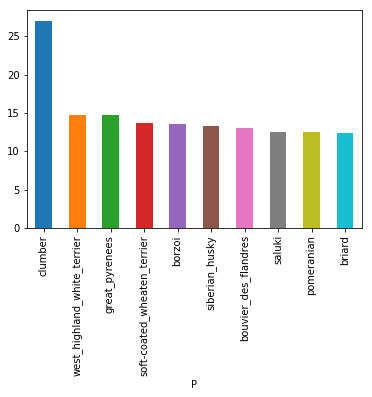

In [155]:
#Which dog pics had the best rating 
main_df.groupby('P').rating_numerator.mean().nlargest(10).plot(kind = 'bar');

# 2. Insight

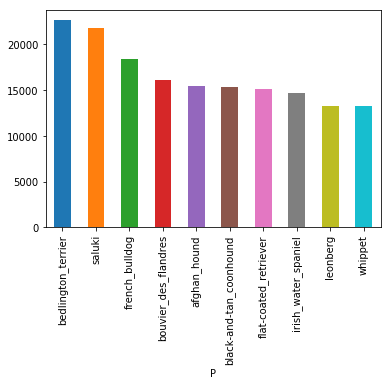

In [156]:
# dogs with the greatest favorit count 
main_df.groupby('P').favorite_count.mean().nlargest(10).plot(kind = 'bar');

# 3. Insight

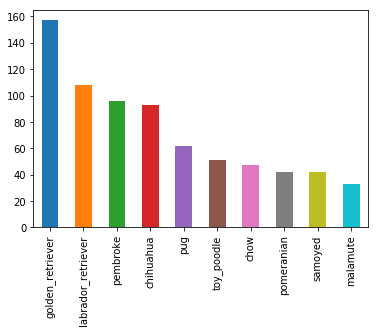

In [157]:
#Most Popular dogs overall
base_color = sb.color_palette()[0]

d = main_df.query('P != "nan"').P.value_counts().nlargest(10).plot( kind = 'bar')

# 4. Insight

In [158]:
main_df['Stage'].value_counts()

pupper     168
doggo       65
puppo       21
floofer      7
Name: Stage, dtype: int64

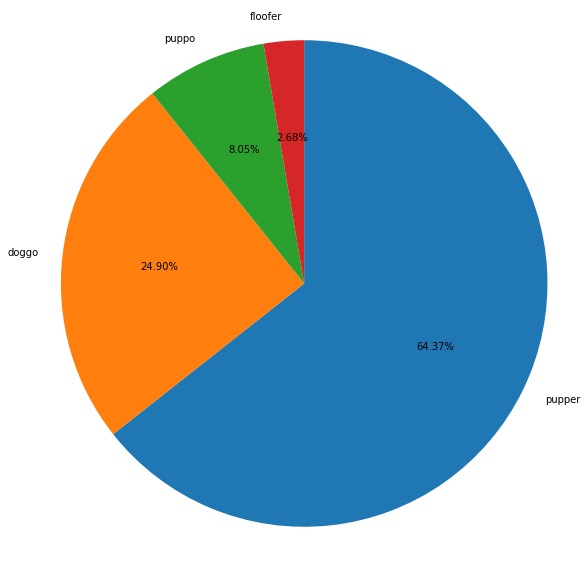

In [159]:
#Which dog stafe is the most popular
plt.figure(figsize=(10,10))
sorted_counts = main_df.query('Stage != "NaN"').Stage.value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%.2f%%', counterclock = False);

plt.axis('square');
plt.xticks(rotation=90);